# Thema
I roughly calibrated H spectrum in ./calibration_niihama<br>
However I couldn't cleary determin the lines, so I use Ne spectrum

In [1]:
%pylab inline

import os
from os.path import join
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


In [2]:
bpth = join(os.path.expanduser('~'), 'works', 'myLeprecon')
specpath = join(bpth, 'SpectrometerData', '20201006')

# Plot waterfall
I arranged all the data vertically.<br>
The red number on the left of the graph show the rotation of the moter. The horizontal axis of the graph is the horizontal pixel value of the each image.<br>
We can see from the graph that the images next to each other overlap about half.

### Hydrogen

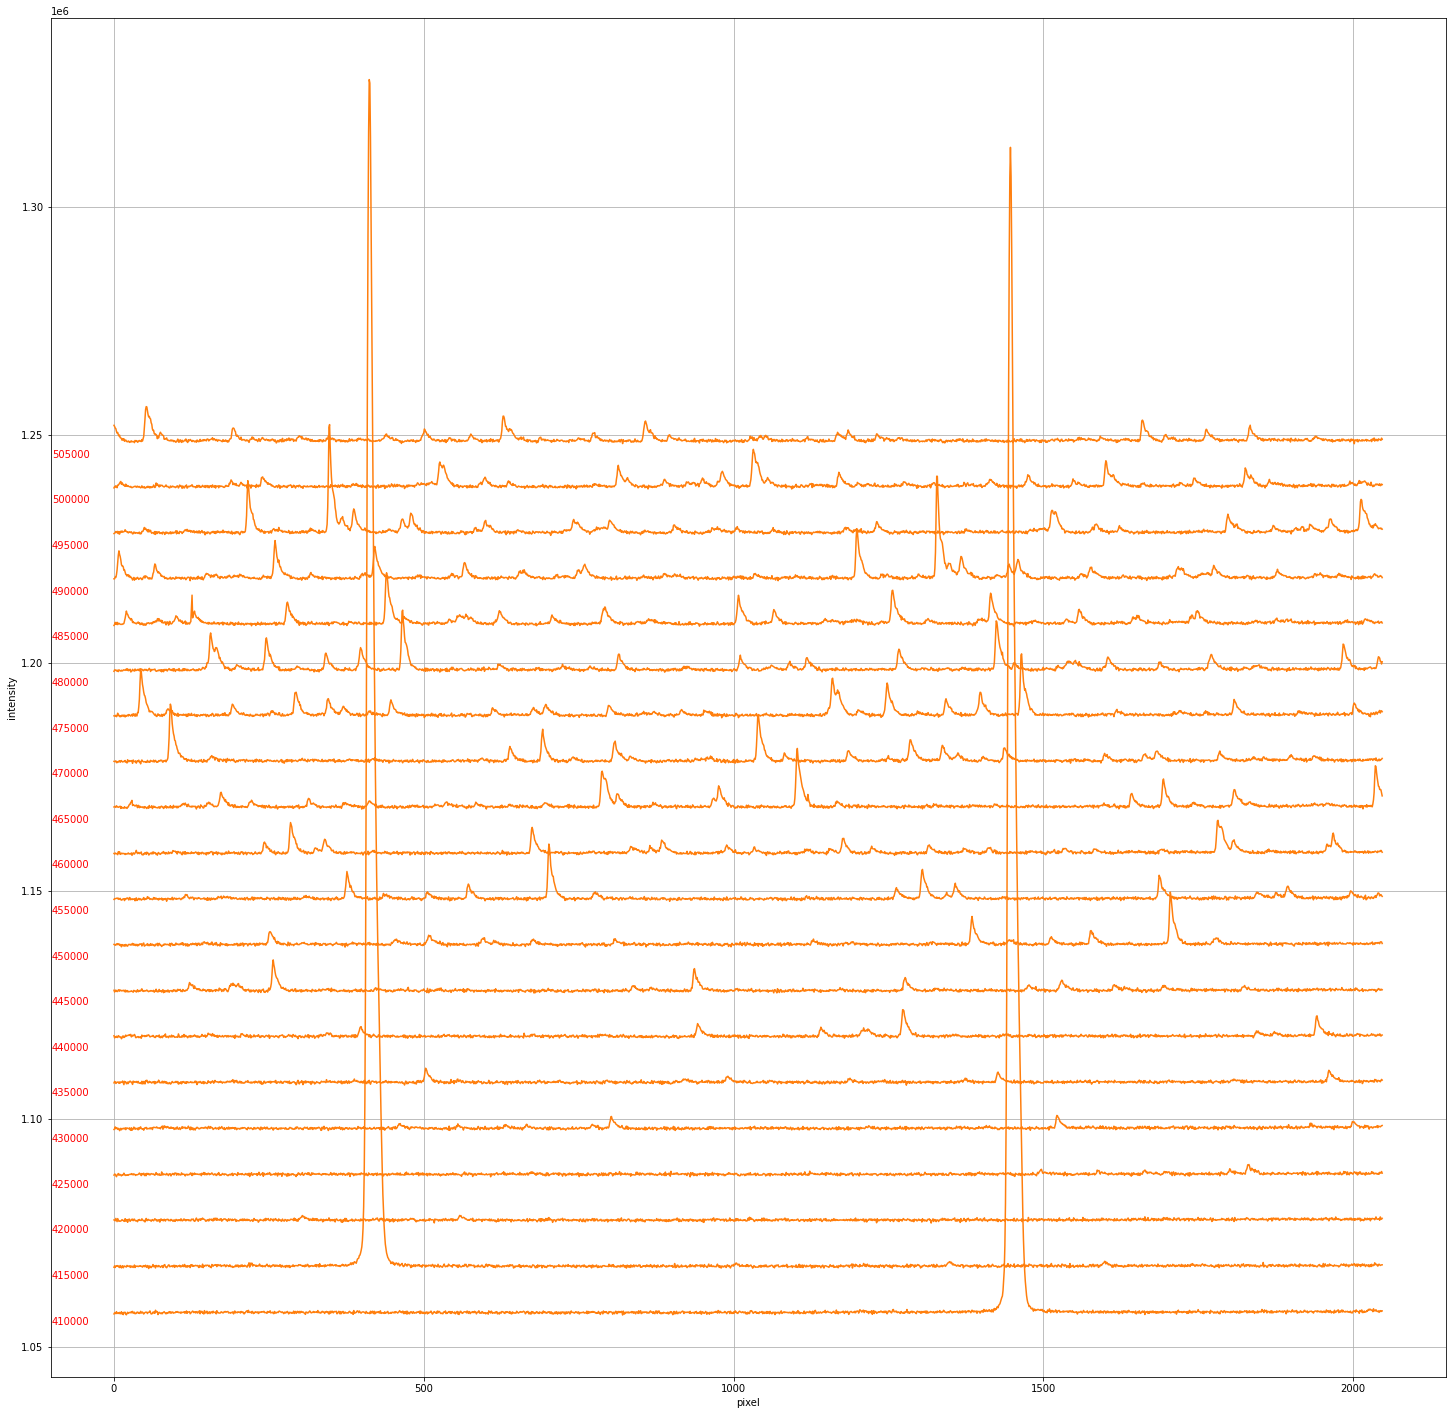

In [3]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

R = [f'H_{410000 + 5000 * i}.nc' for i in range(20)]
for i, fp in enumerate(R):
    image_data = xr.open_dataset(join(specpath, fp))

    plot(image_data.to_array()[0].sum(axis=0) + i * 1e4, f'C1')
         
[text(-100, 1.055e6 + 1e4 * i, t[2:-3], color='r') for i, t in enumerate(R)]
xlabel('pixel')
ylabel('intensity')
# rcParams['font.size'] = 30
grid()

### Neon

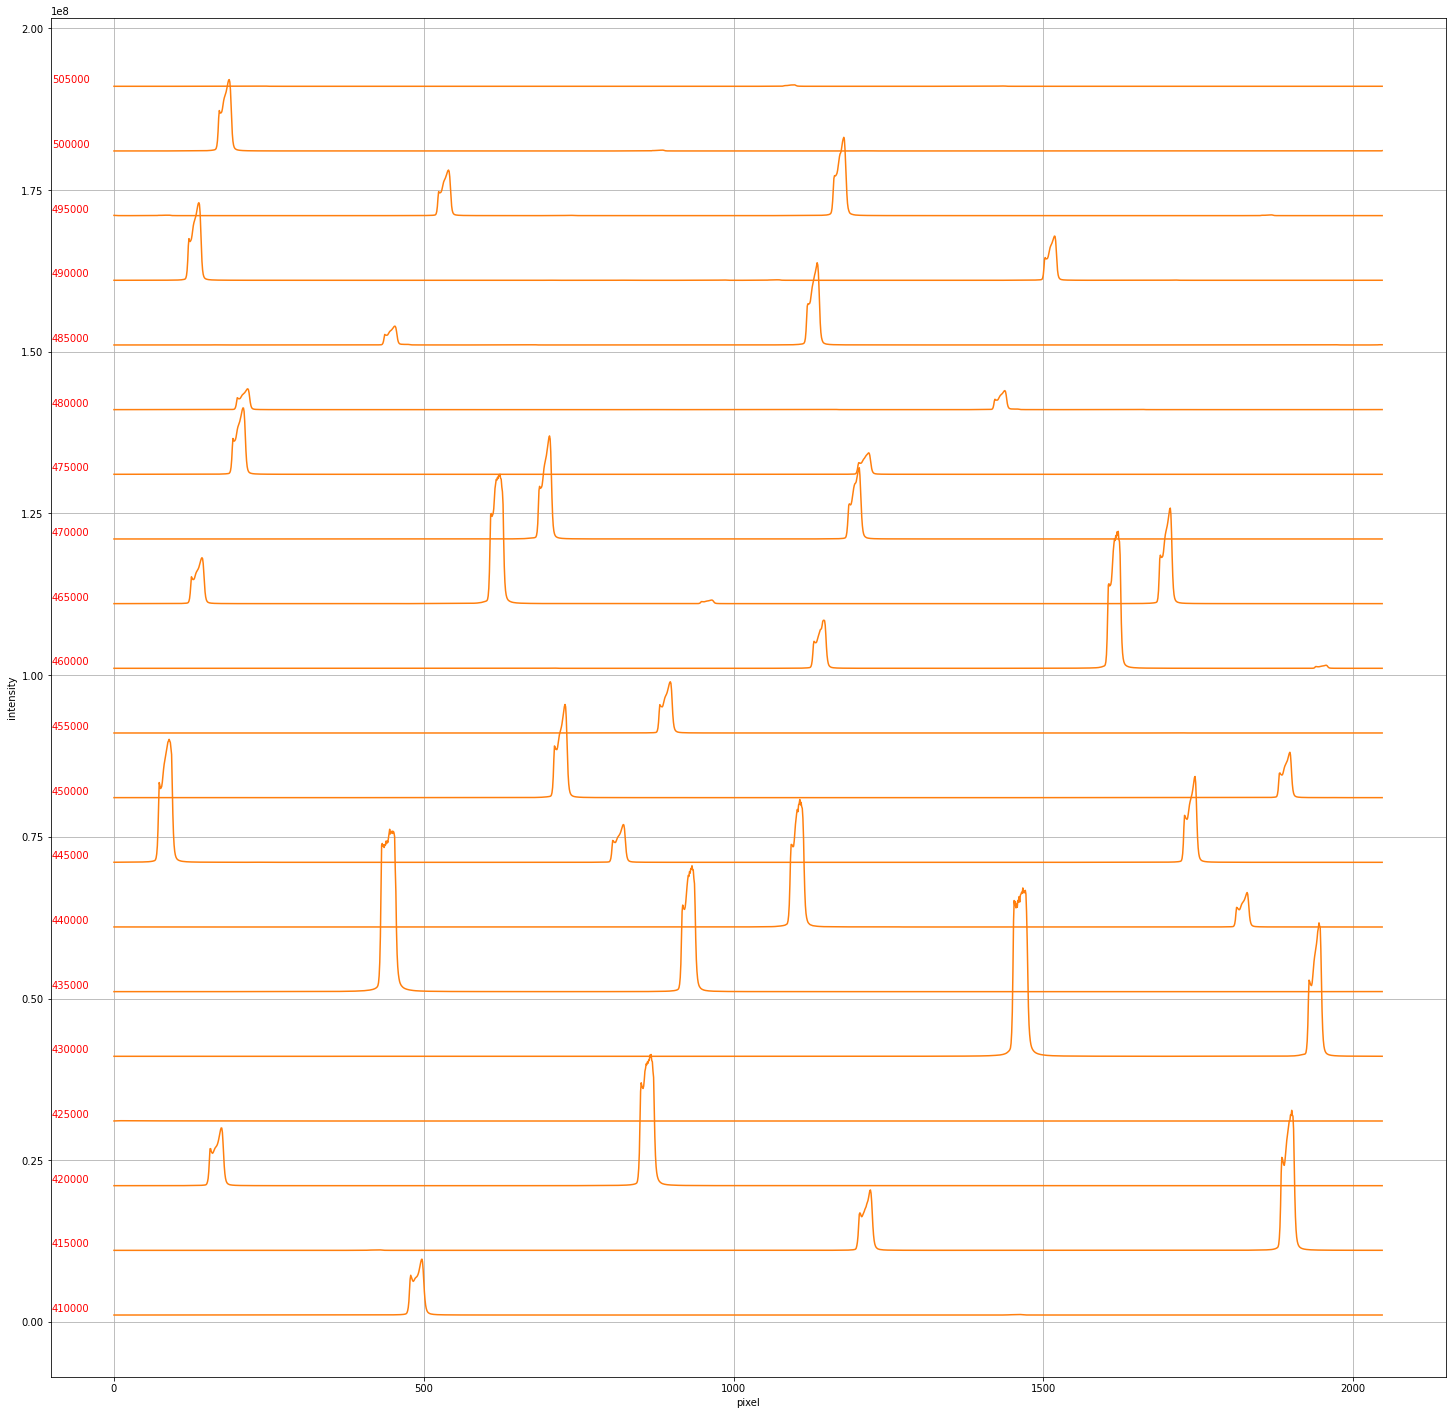

In [4]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

R = [f'Ne_{410000 + 5000 * i}.nc' for i in range(20)]
for i, fp in enumerate(R):
    image_data = xr.open_dataset(join(specpath, fp))

    plot(image_data.to_array()[0].sum(axis=0) + i * 1e7, f'C1')
         
[text(-100, 1.6e6 + 1e7 * i, t[3:-3], color='r') for i, t in enumerate(R)]
xlabel('pixel')
ylabel('intensity')
grid()

# Overlap neighbours

### Neon

(1000.0, 2000.0)

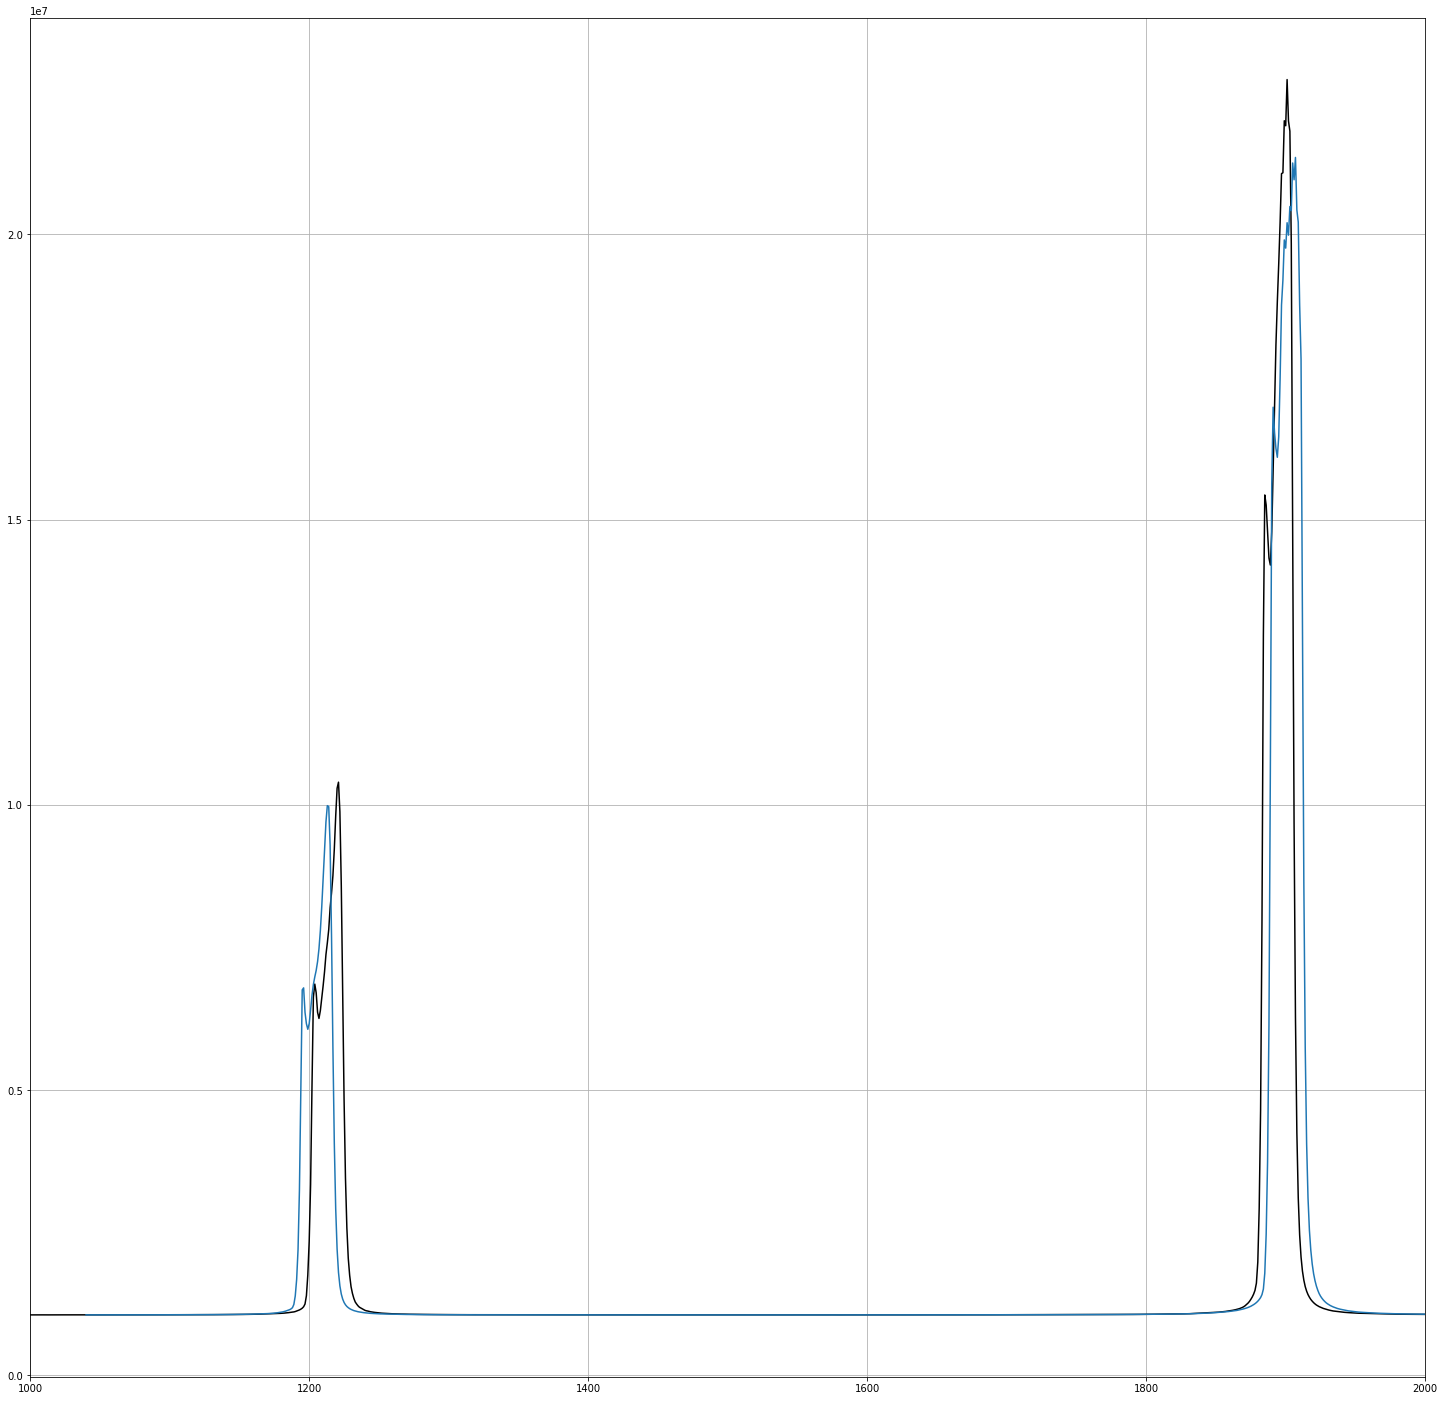

In [5]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'Ne_415000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'Ne_420000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 1040, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

(1000.0, 2000.0)

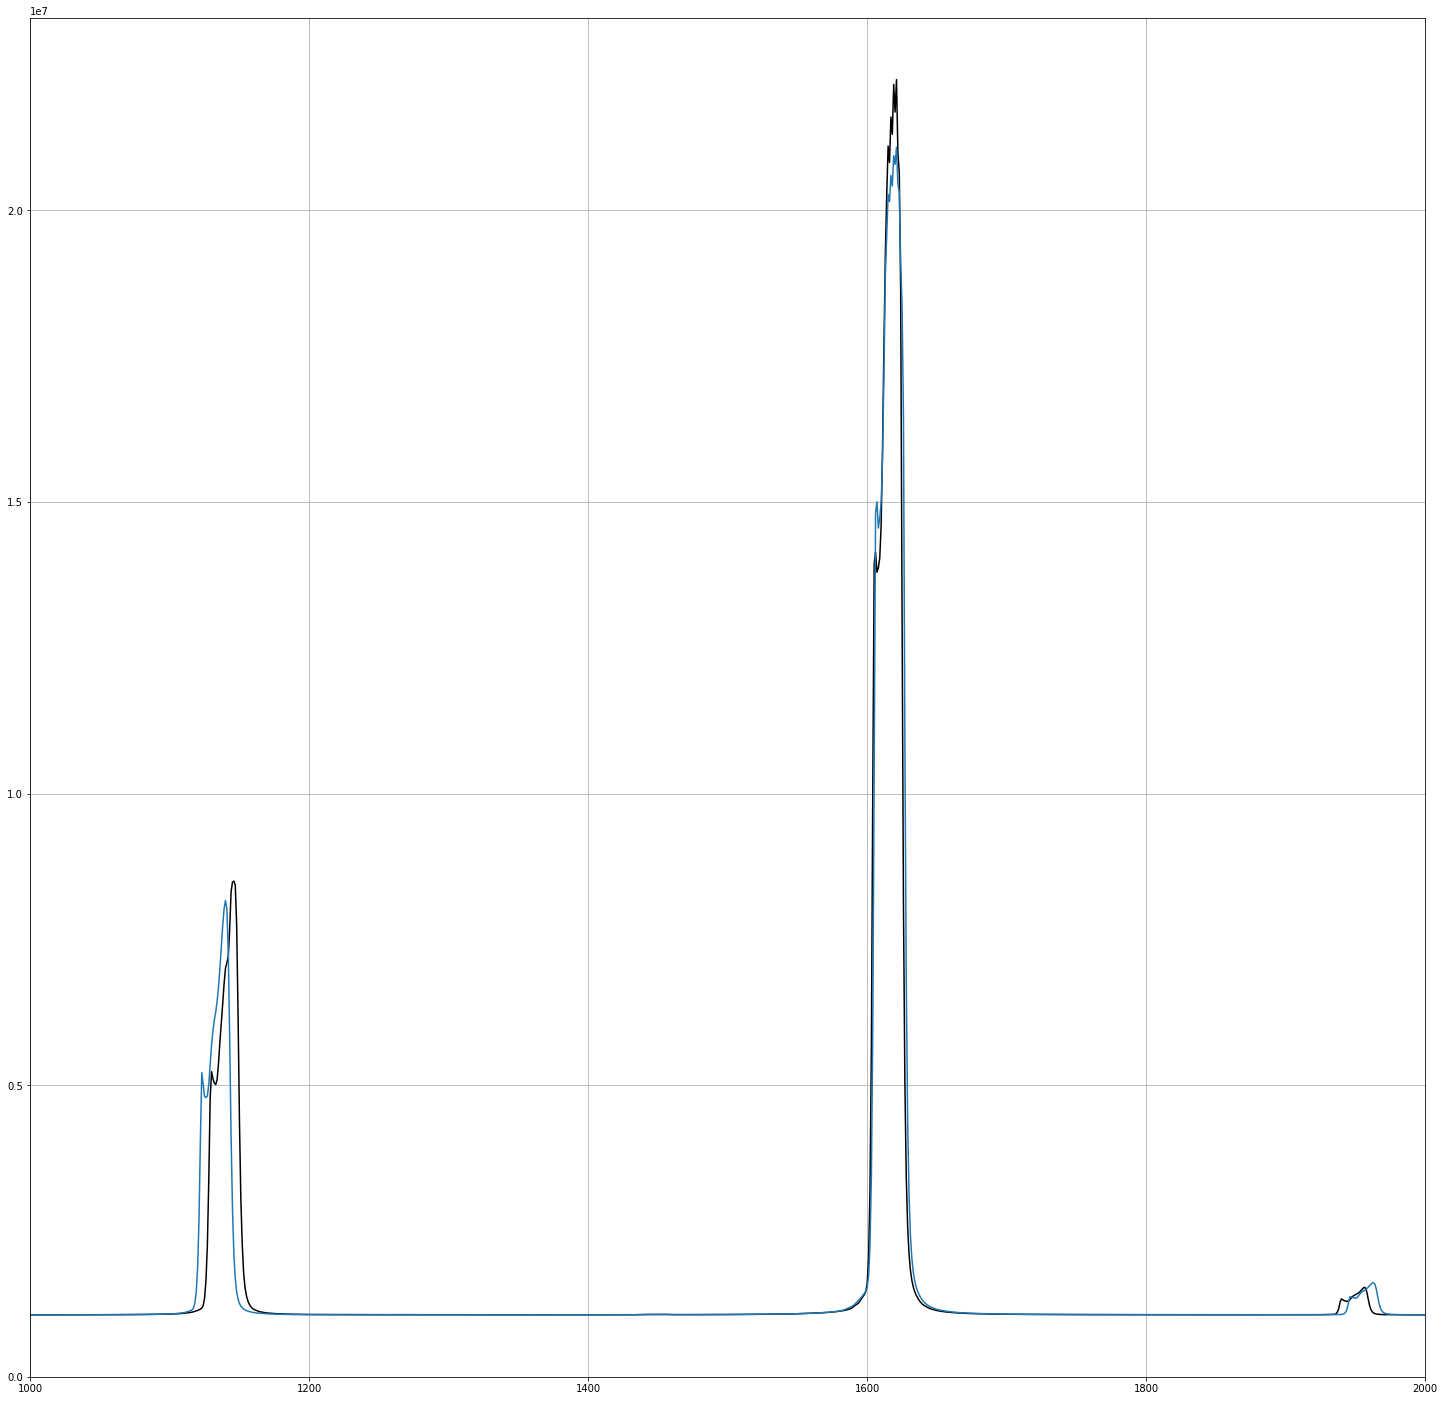

In [6]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'Ne_460000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'Ne_465000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 998, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

(1000.0, 2000.0)

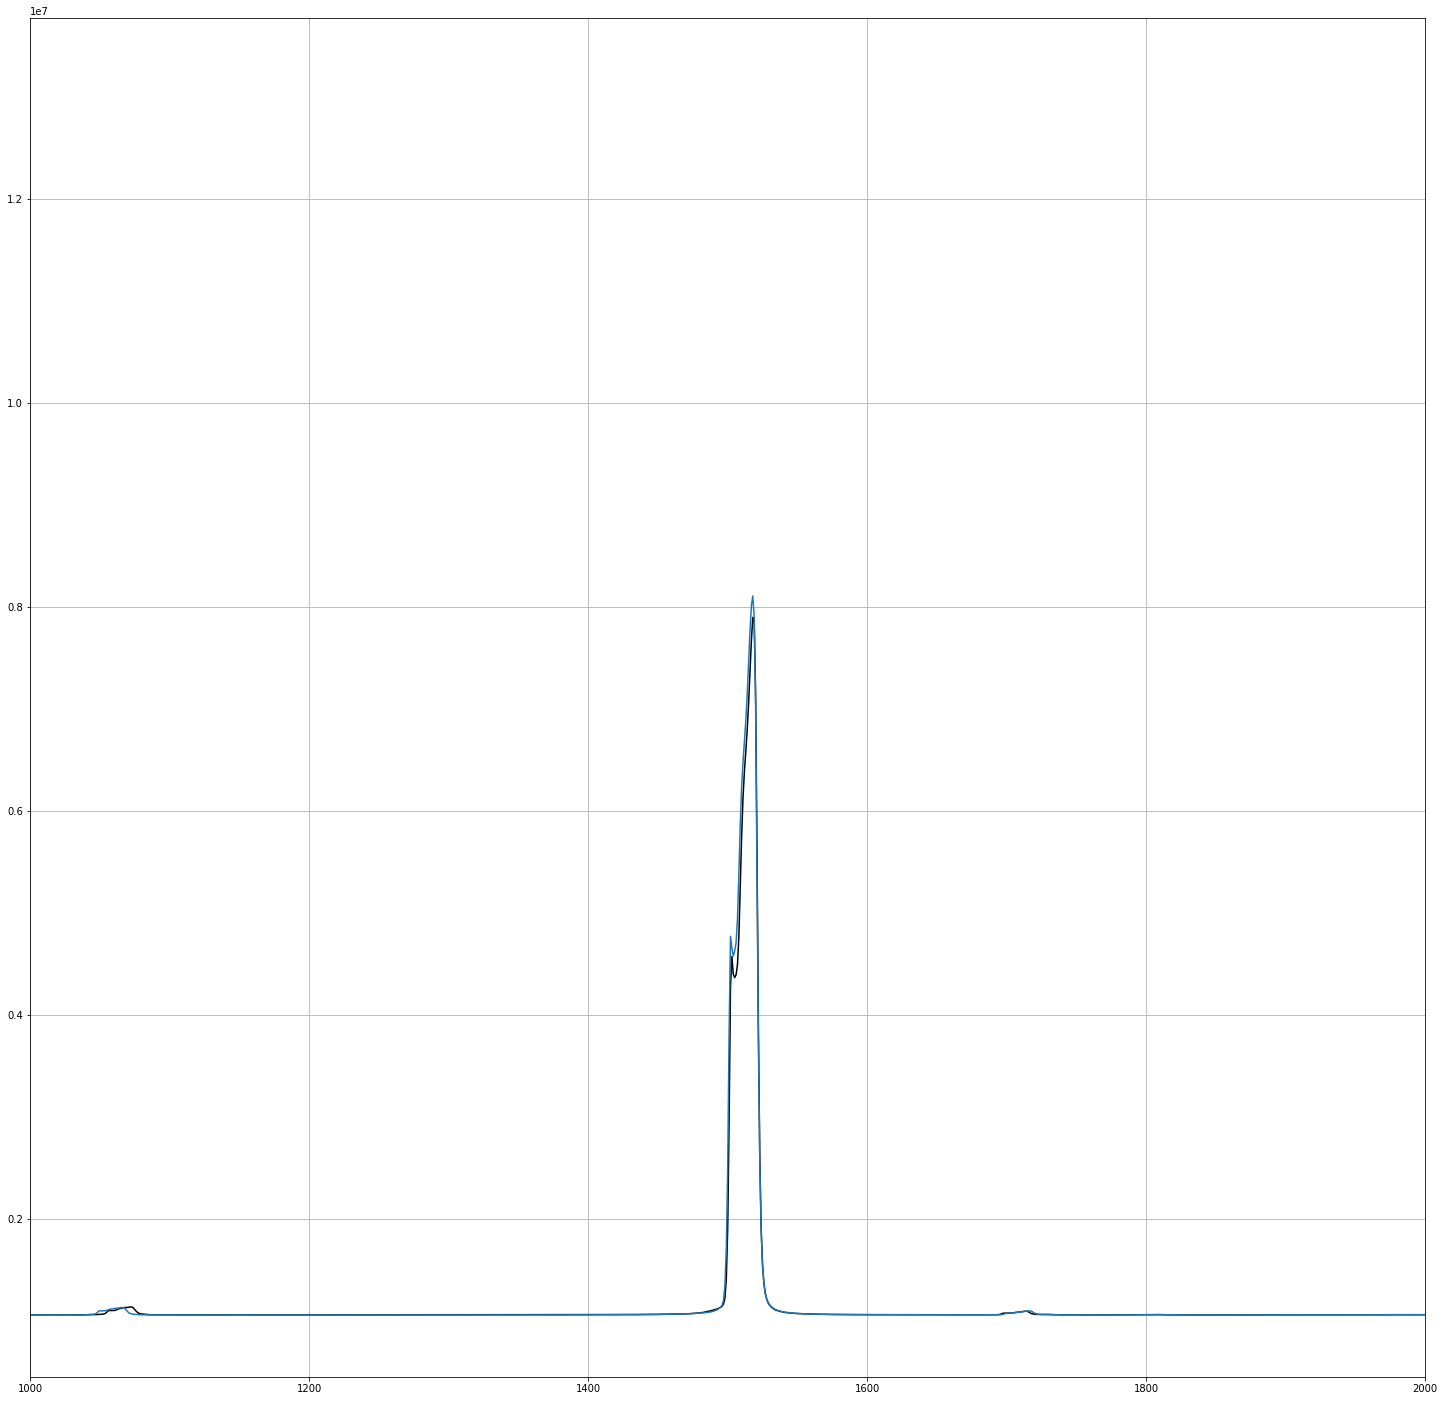

In [7]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 'Ne_490000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 'Ne_495000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 978, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

# moter-to-sizeOfOverlap
I made a graph of the moter range and the size of the overlap.

[-8.35087719e-04  1.38529825e+03]


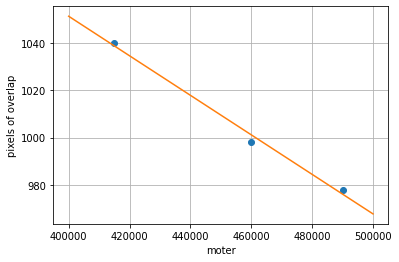

In [8]:
index = np.array([415000,460000, 490000])
overlap = np.array([1040, 998, 978])
plot(index, overlap, 'o')

fun = np.poly1d(np.polyfit(index, overlap, 1))
x = np.linspace(400000, 500000, 100)
plot(x, fun(x))

grid()

xlabel('moter')
ylabel('pixels of overlap')

print(fun.coef)

# Make an overlap spectrum
I estimated the size of overlap by the previous graph.<br>
By the function, I overlaid all the data.

### Neon

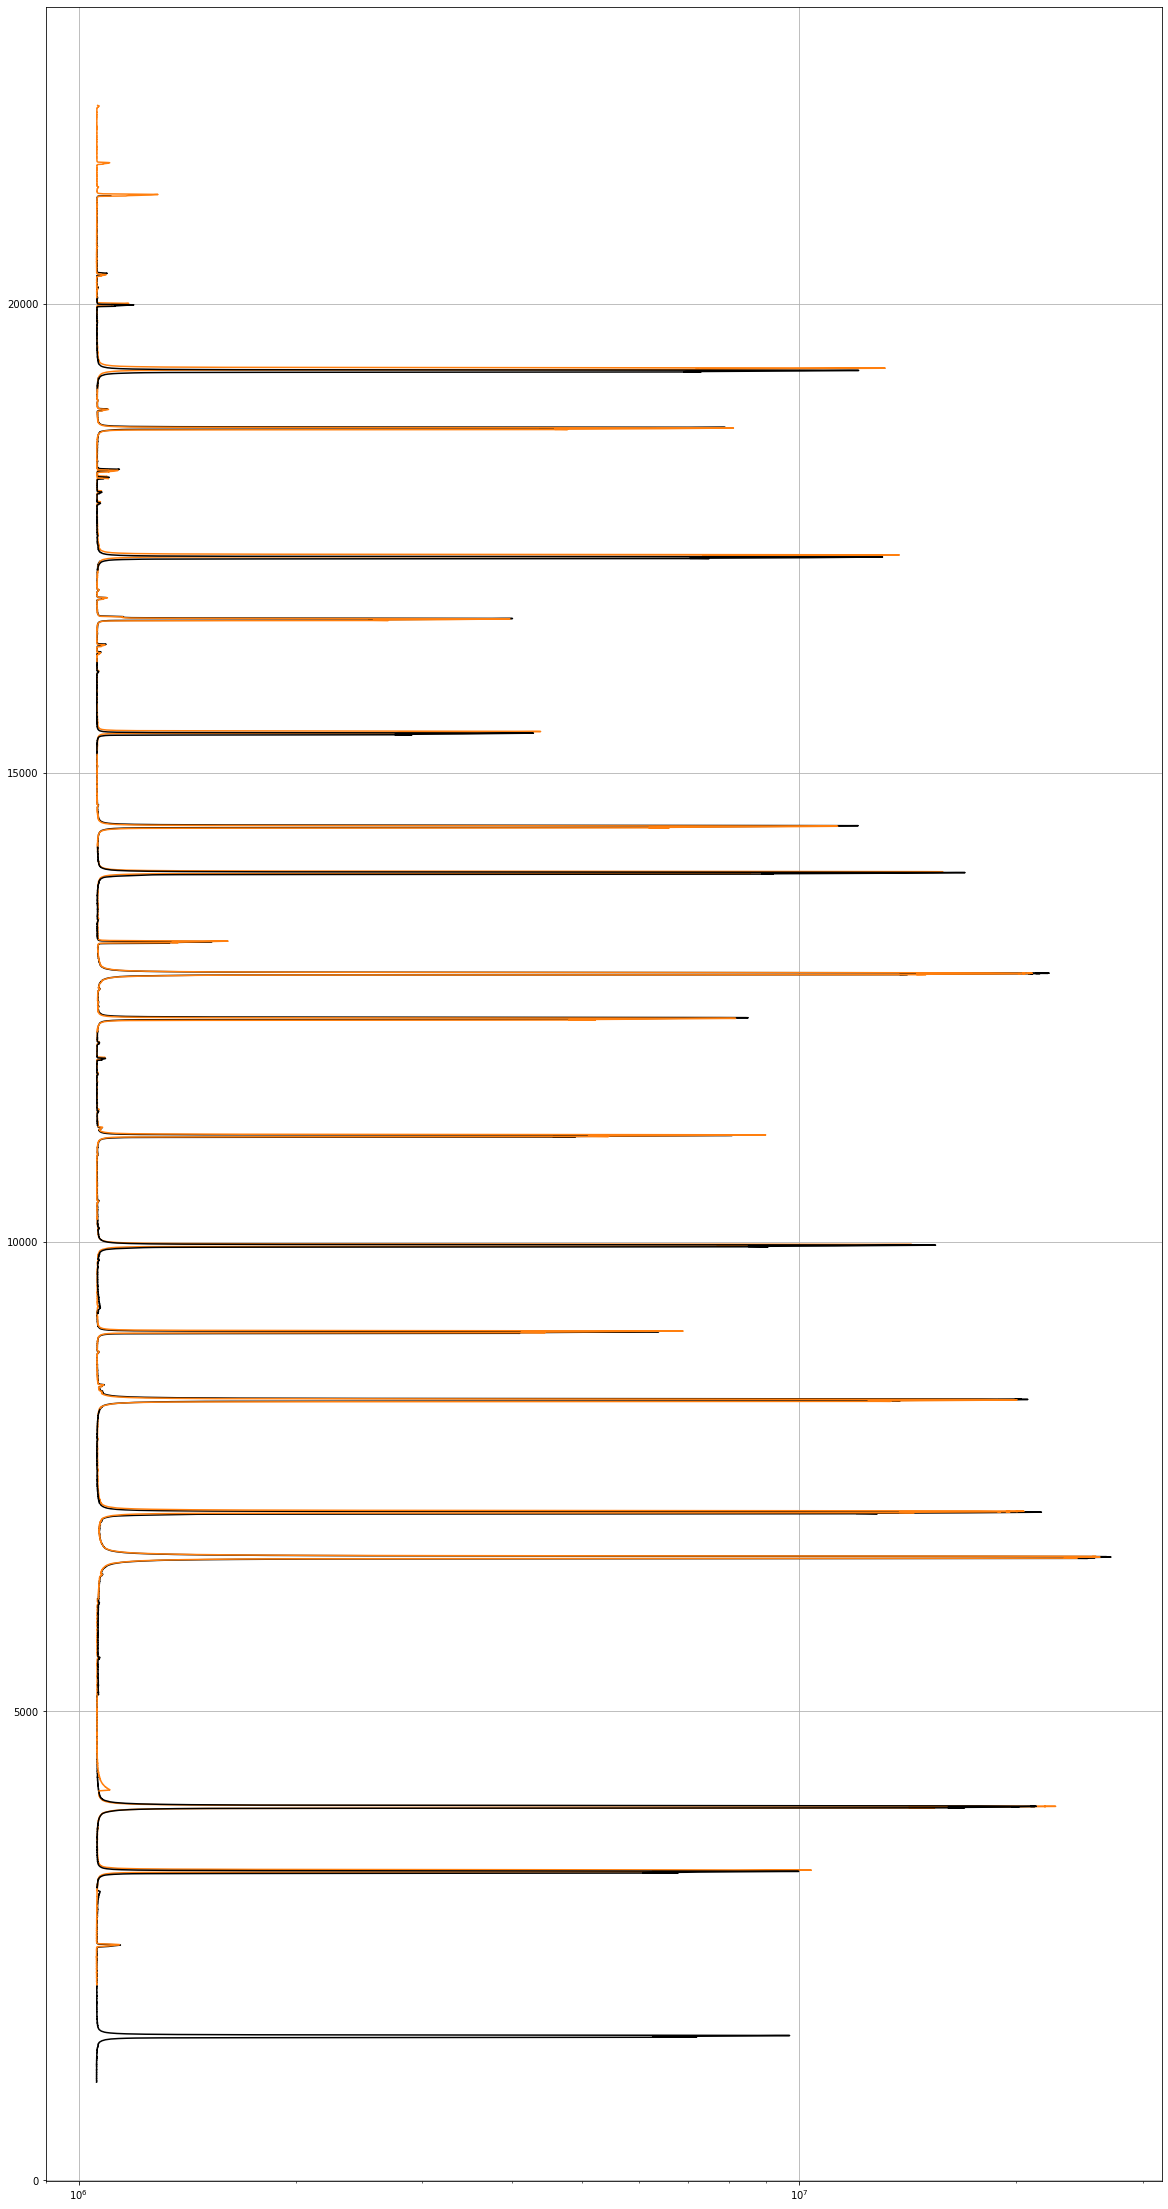

In [9]:
R = [f'Ne_{410000 + 5000*i}.nc' for i in range(20)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,40])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
xscale('log')

### Hydrogen

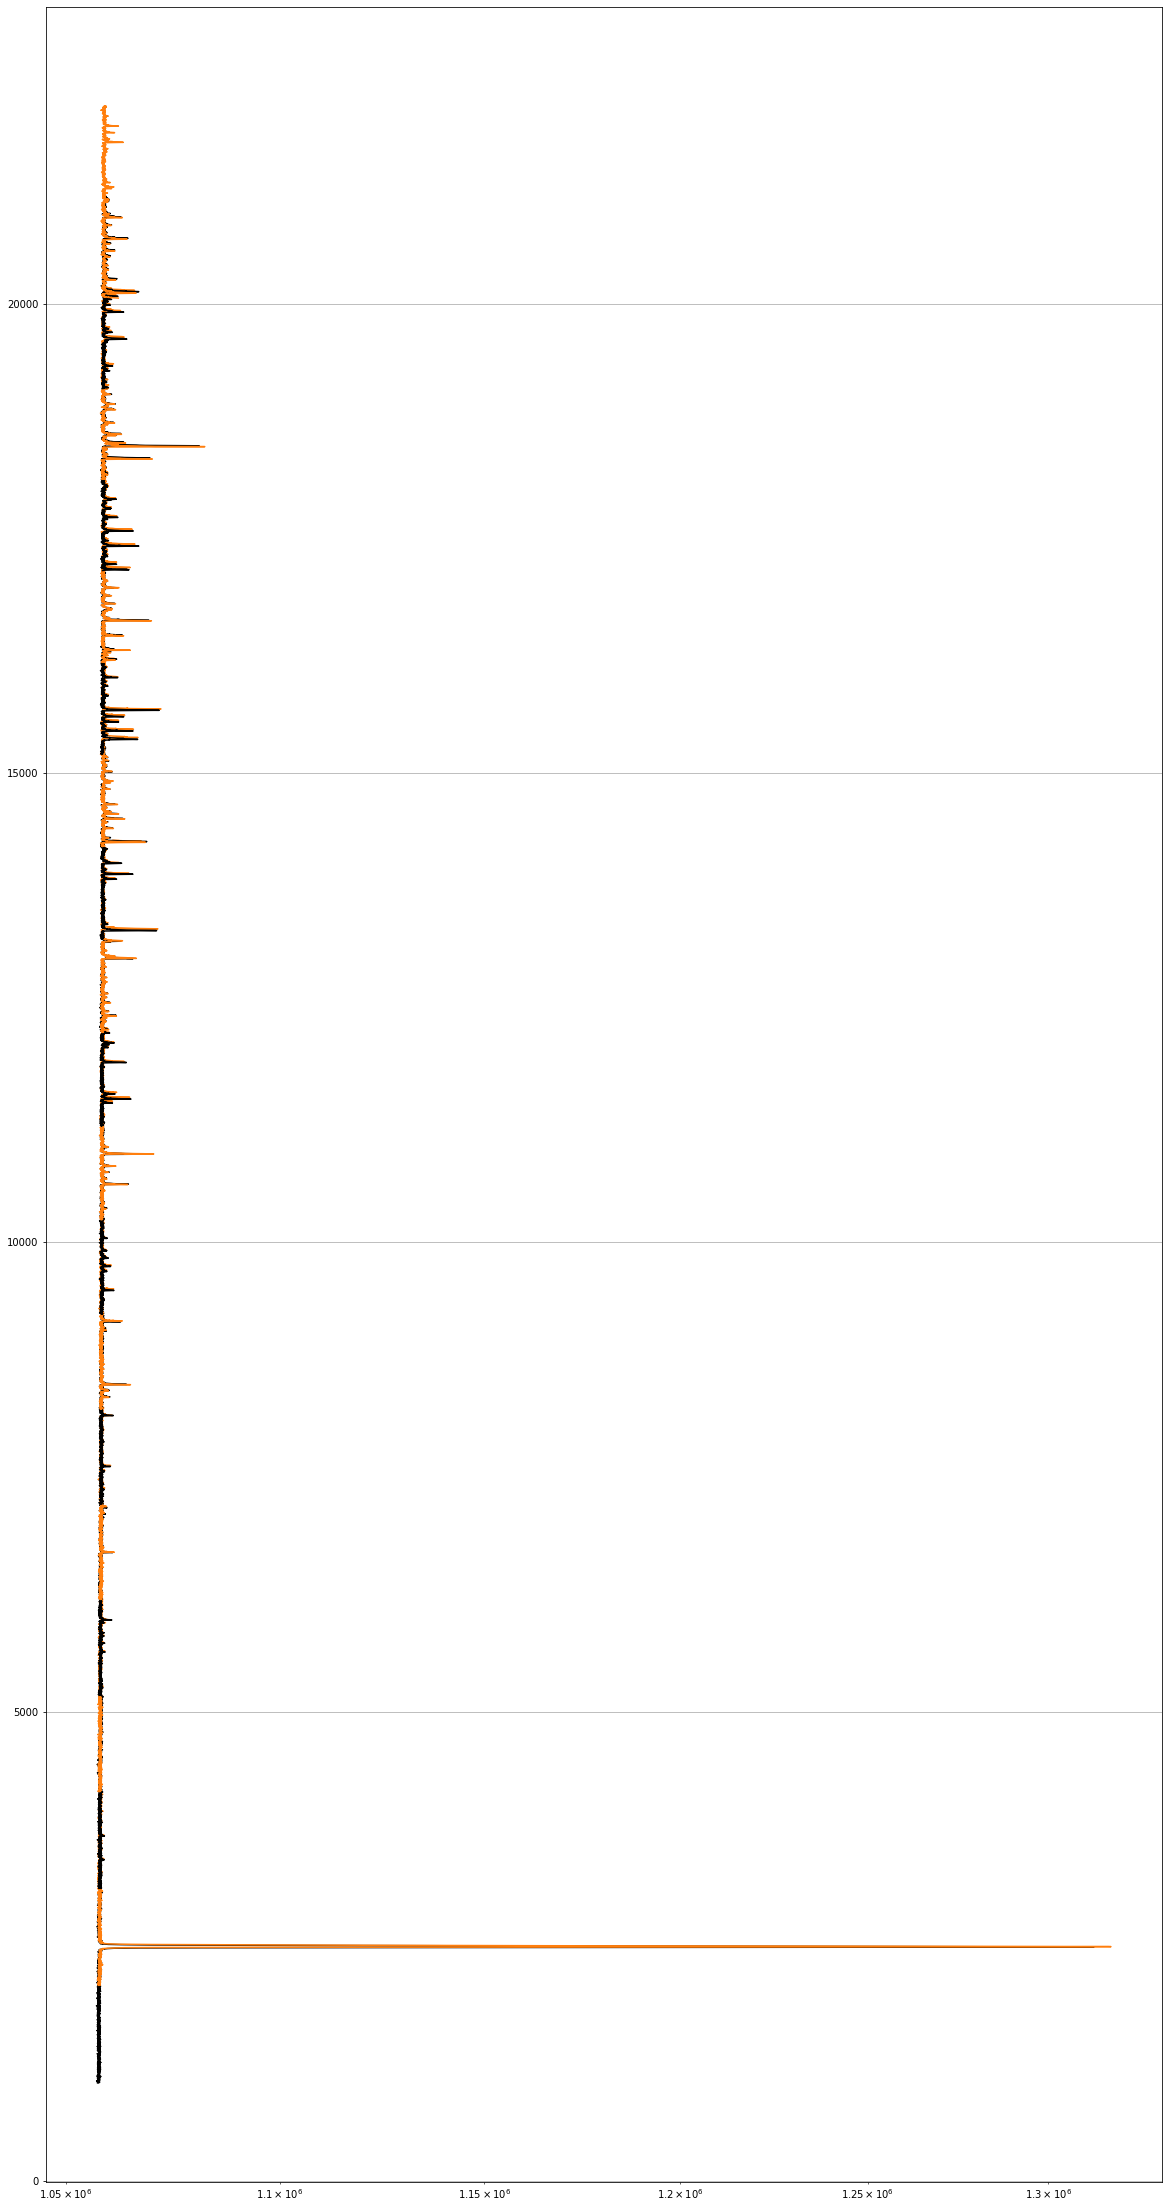

In [10]:
R = [f'H_{410000 + 5000*i}.nc' for i in range(20)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,40])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
xscale('log')

I estimated that the line of 2490 pixel is 656.279nm

# Analyze Neon spectrum

Text(10000000.0, 17490, 'about 593nm')

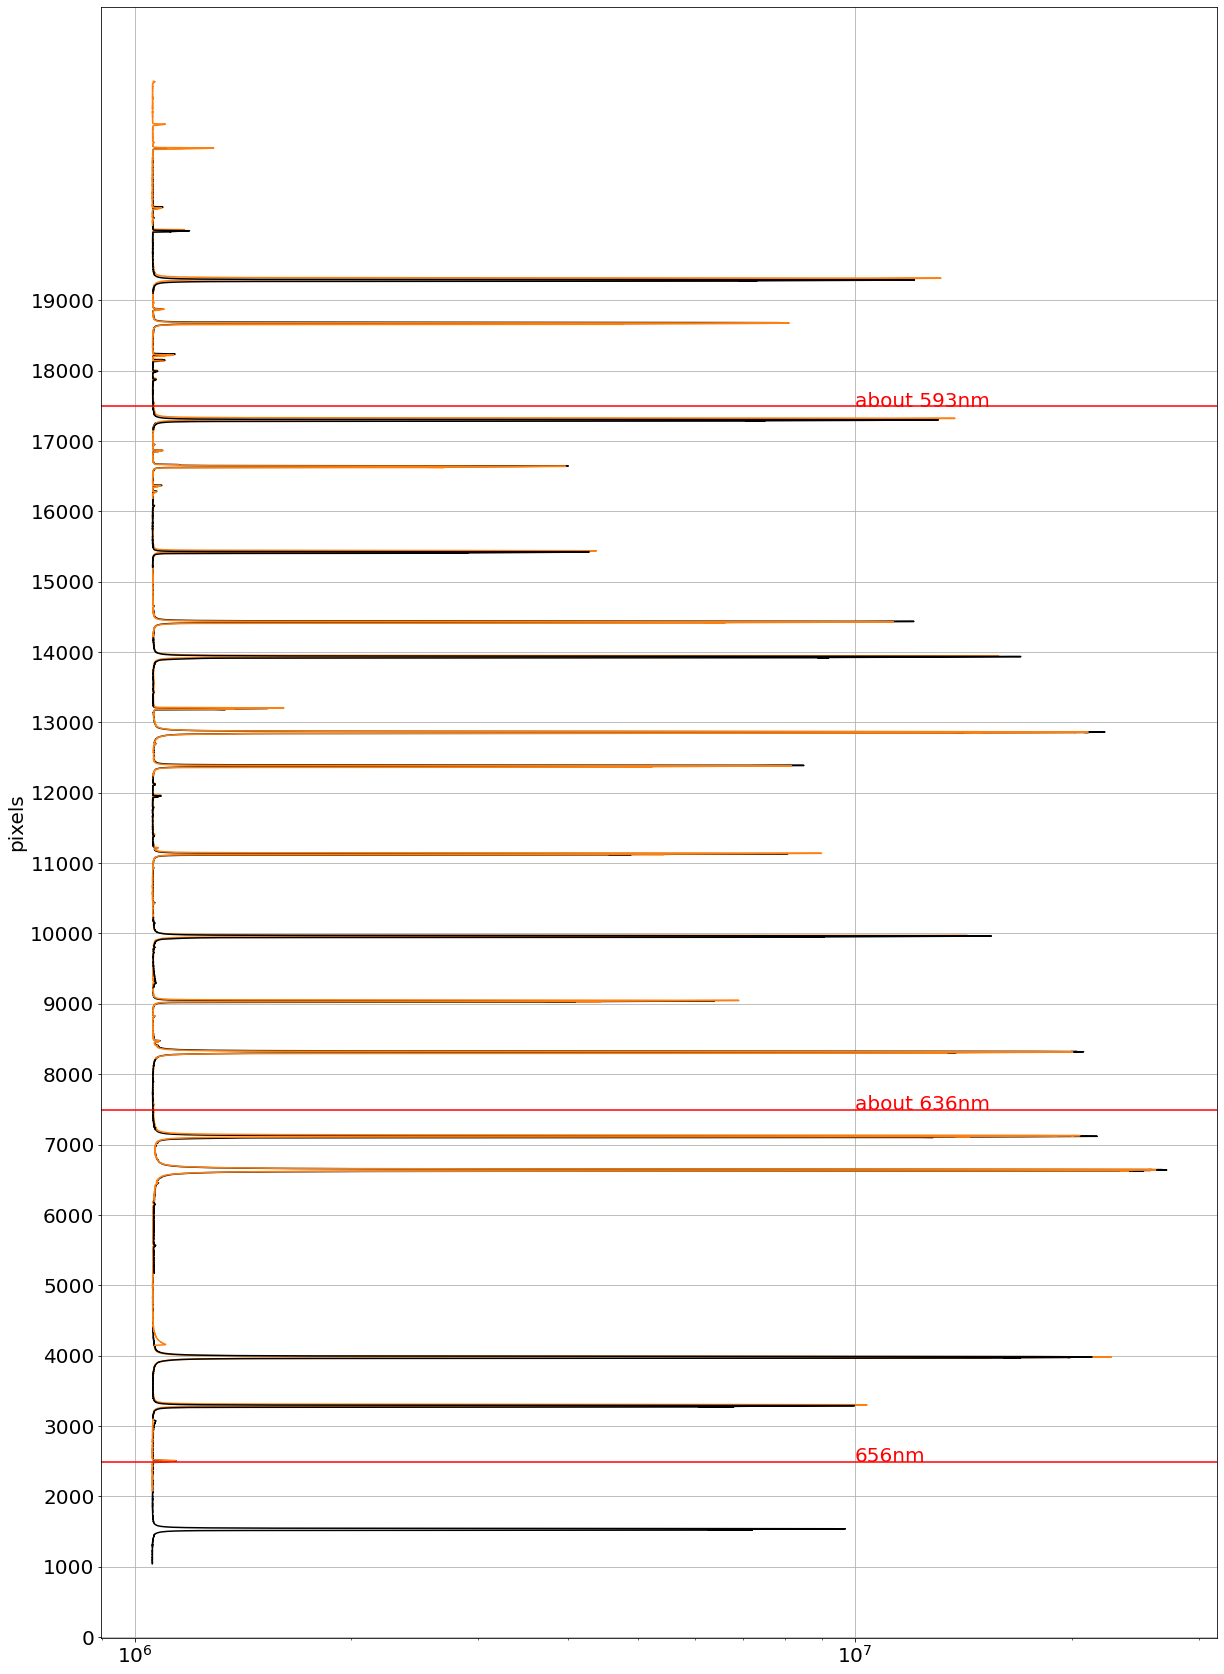

In [25]:
R = [f'Ne_{410000 + 5000*i}.nc' for i in range(20)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,30])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
rcParams['font.size'] = 20
xscale('log')
yticks(range(0, 20000, 1000))
ylabel('pixels')

axhline(2490, color='red')
text(1e7, 2490, '656nm', color='red')
axhline(7490, color='red')
text(1e7, 7490, 'about 636nm', color='red')
axhline(17490, color='red')
text(1e7, 17490, 'about 593nm', color='red')

# axhline(7080, color='blue')
# text(1e7, 7080, '638nm?', color='blue')
# axhline(6570, color='blue')
# text(1e7, 6570, '640nm?', color='blue')
# axhline(3880, color='blue')
# text(1e7, 3880, '650nm?', color='blue')
# axhline(3380, color='blue')
# text(1e7, 3380, '659nm?', color='blue')


# 既知のネオンの発光線
[NIST](https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra=ne+i&limits_type=0&low_w=&upp_w=&unit=1&submit=Retrieve+Data&de=0&format=0&line_out=0&en_unit=0&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=0&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on)より

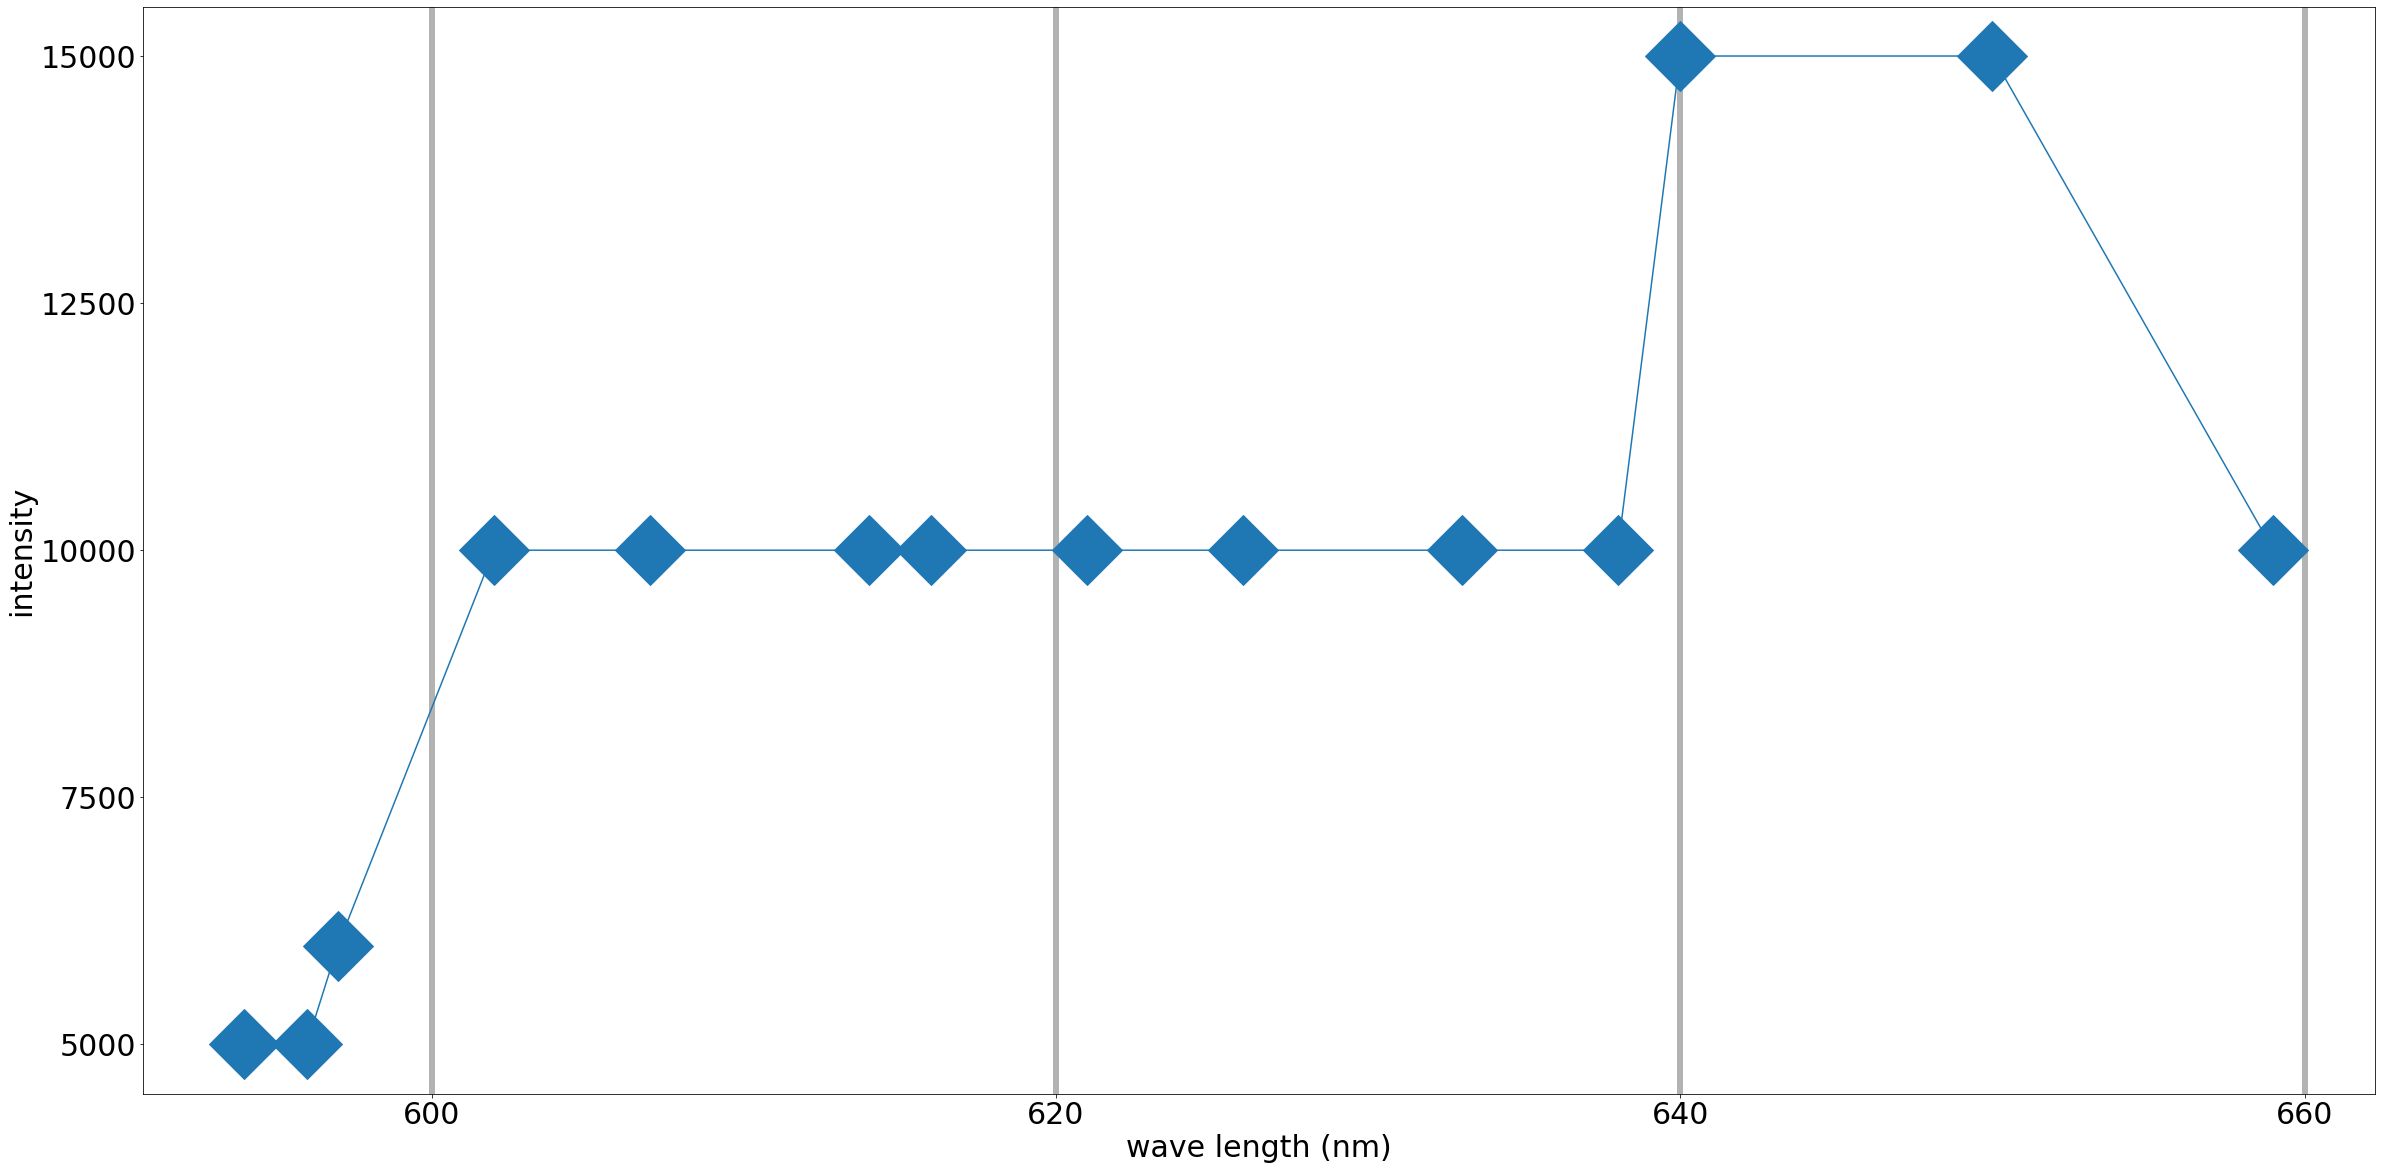

In [14]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([40,20])
grid(which='major', linewidth=6, axis='x', alpha=10)

wave_length = np.array([594, 596, 597, 602, 607, 614, 616, 621, 626, 633, 638, 640, 650, 659])
intensity = np.array([5000, 5000, 6000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 15000, 15000, 10000])
plot(wave_length, intensity, marker='D', markersize=50)

xlabel('wave length (nm)')
ylabel('intensity')
rcParams['font.size'] = 100